In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data =pd.read_csv(r"C:\Users\hp\OneDrive - Amity University\Apps\archive (1)\Survey.csv")

In [13]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [14]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [15]:
data.shape

(1259, 27)

In [16]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: >

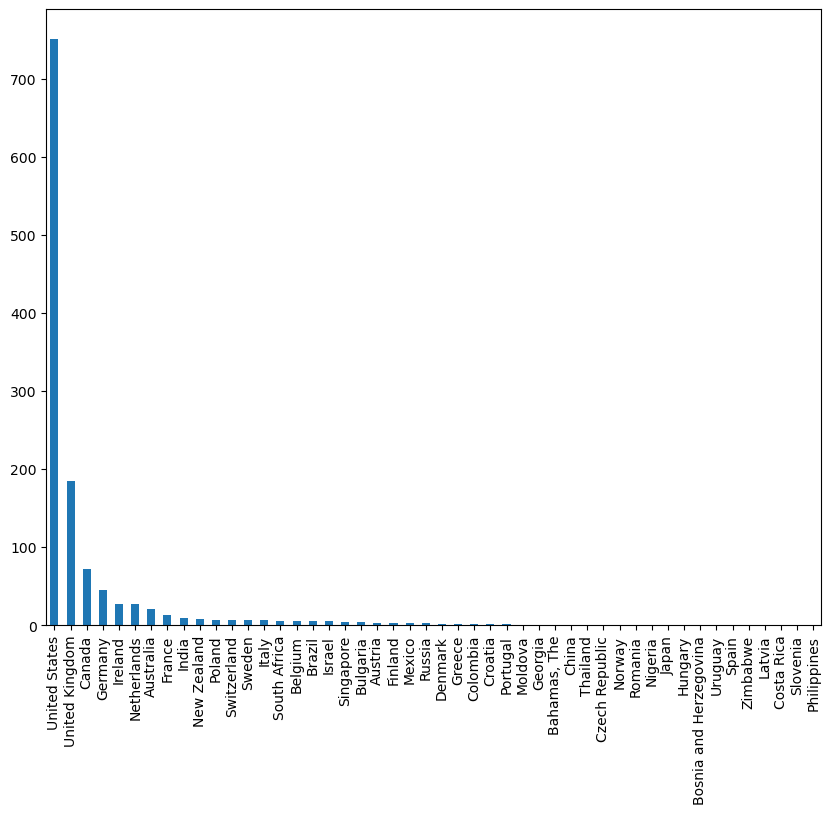

In [17]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [18]:
data.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [19]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [20]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [21]:
data['self_employed'].fillna('No', inplace=True)

In [22]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [23]:
data['work_interfere'].fillna('N/A',inplace=True)

<Axes: >

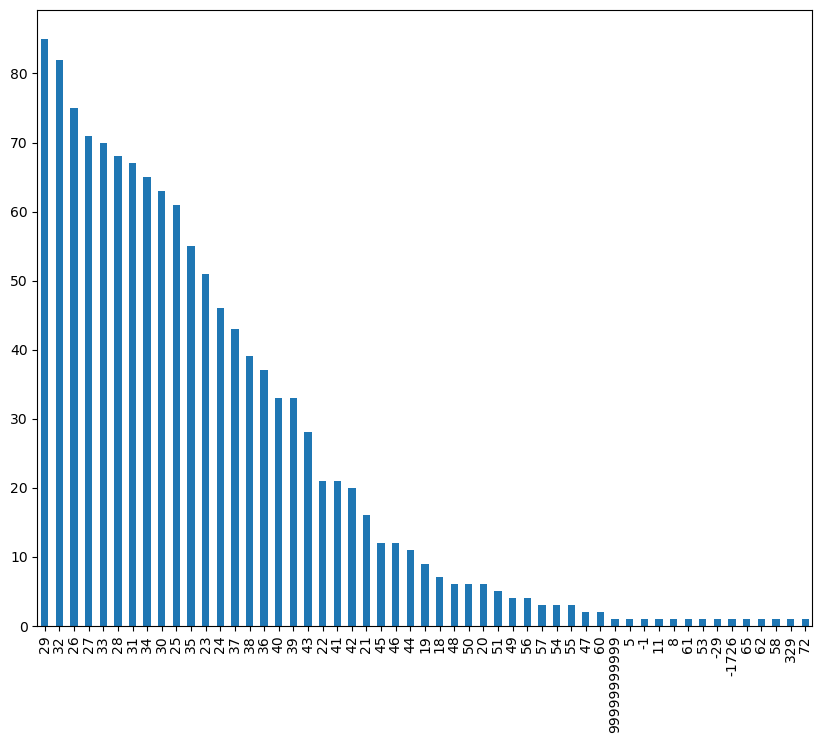

In [24]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [25]:
data.drop(data[(data['Age']>60) |  (data['Age']<18)] .index,  inplace=True)

<Axes: >

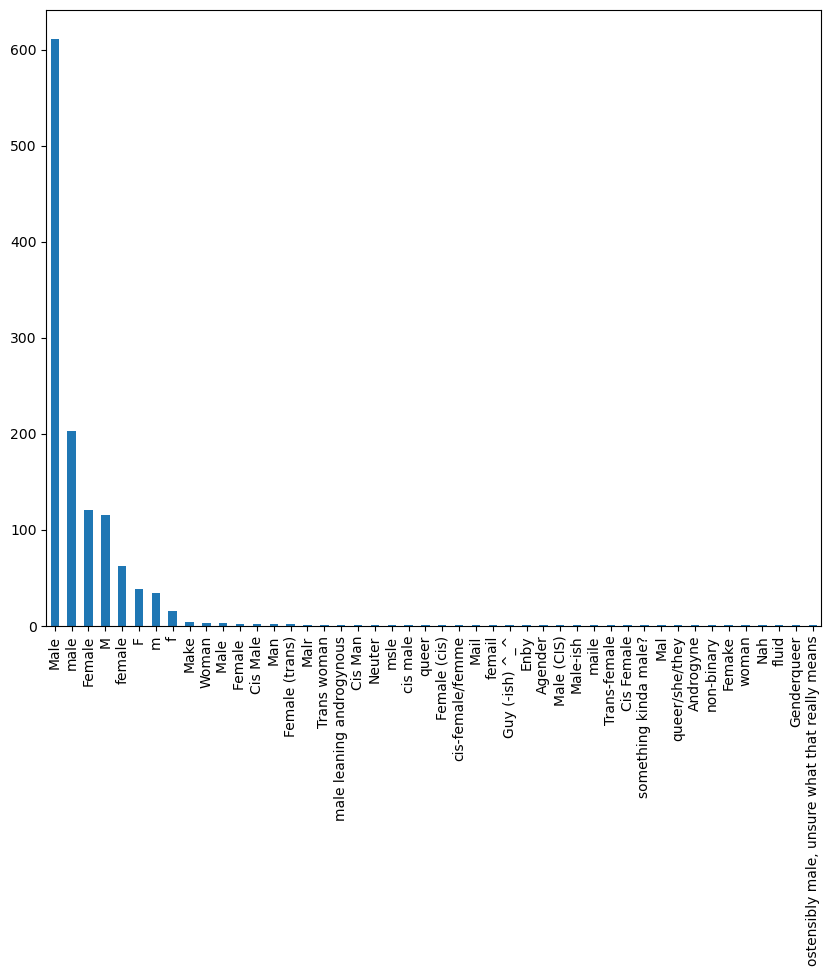

In [26]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [27]:
data['Gender'].replace(['Male','male','M','m','Male','Cis Male',
                        'Man','cis male','Mail','Male-ish','Male(CIS)',
                       'Cis Man','msle','Malr','Mal','maile','Make' ,],'Male',inplace=True)
data['Gender'].replace([ 'Female','female','F','f','Woman','Female',
                       'femail','Cis Female','cis-female/femme','Femake','Female(cis)',
                       'woman',], 'Female', inplace=True)
data["Gender"].replace(['Female(trans)','queer/she/they','non-binary',
                       'fluid','queer','Androgyne','Trans-female','male learning androgynous',
                        'Agender','A little about you', 'Nah','All',
                        'ostensibly male,unsure what that really means',
                       'Genderqueer','Enby','p','Neuter','something kinda male?',
                       'Guy(-ish) ^_^','Trans woman',], 'Non-Binary',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6856\1483789242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

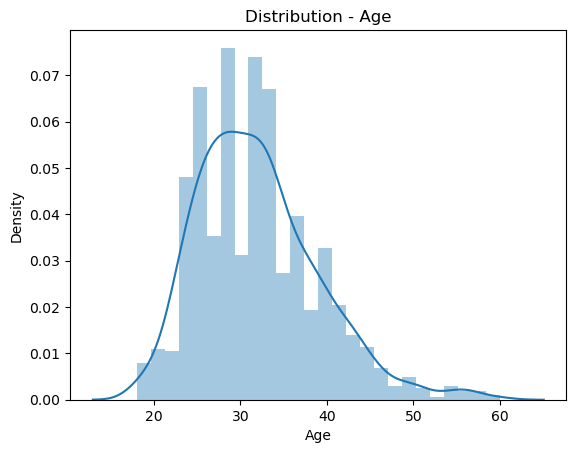

In [28]:
sb.distplot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

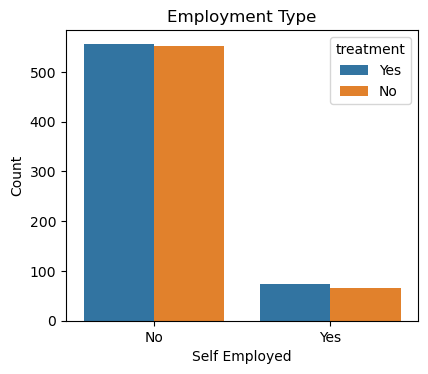

In [29]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(data=data, x='self_employed', hue='treatment')
plt.title('Employment Type')
plt.xlabel('Self Employed')
plt.ylabel('Count')

plt.show()

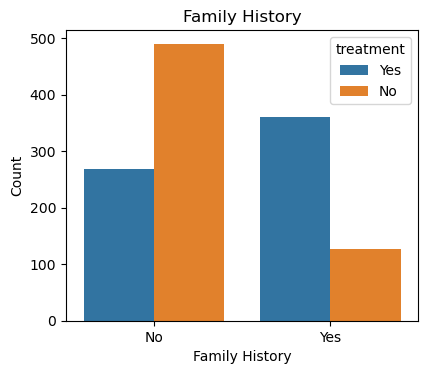

In [30]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(data=data,x='family_history',hue='treatment')
plt.title('Family History')
plt.xlabel('Family History')
plt.ylabel('Count')

plt.show()


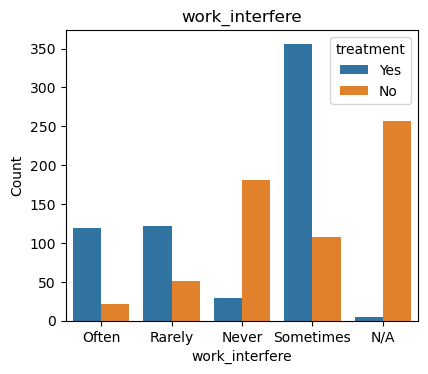

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(data=data,x='work_interfere',hue='treatment')
plt.title('work_interfere')
plt.xlabel('work_interfere')
plt.ylabel('Count')

plt.show()


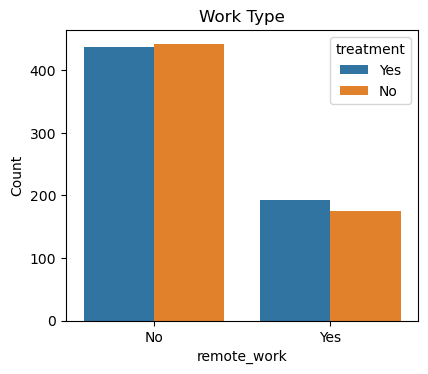

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(data=data,x='remote_work',hue='treatment')
plt.title('Work Type')
plt.xlabel('remote_work')
plt.ylabel('Count')

plt.show()


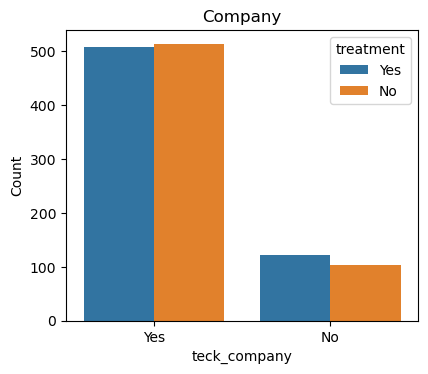

In [33]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(data=data,x='tech_company',hue='treatment')
plt.title('Company')
plt.xlabel('teck_company')
plt.ylabel('Count')

plt.show()


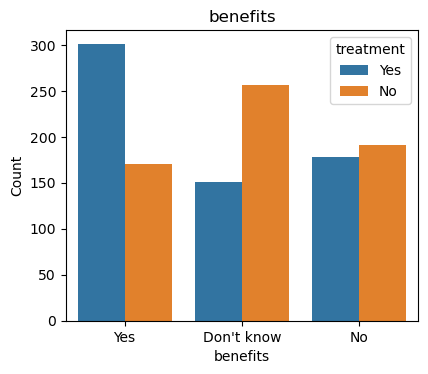

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(data=data,x='benefits',hue='treatment')
plt.title('benefits')
plt.xlabel('benefits')
plt.ylabel('Count')

plt.show()

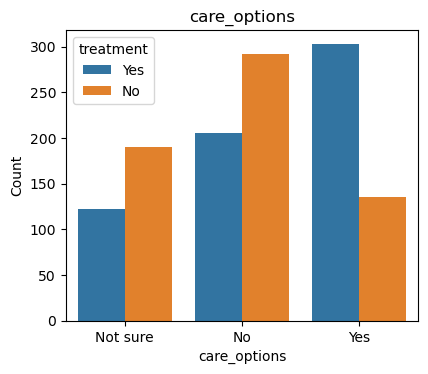

In [35]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(data=data,x='care_options',hue='treatment')
plt.title('care_options')
plt.xlabel('care_options')
plt.ylabel('Count')

plt.show()

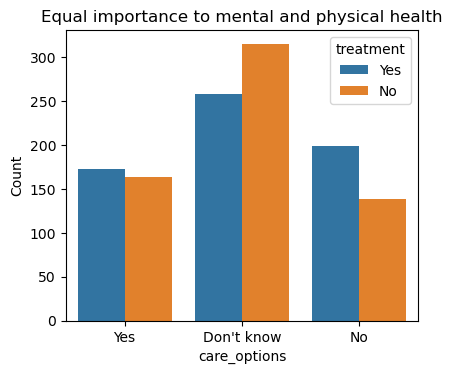

In [36]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(data=data,x='mental_vs_physical',hue='treatment')
plt.title('Equal importance to mental and physical health')
plt.xlabel('care_options')
plt.ylabel('Count')

plt.show()

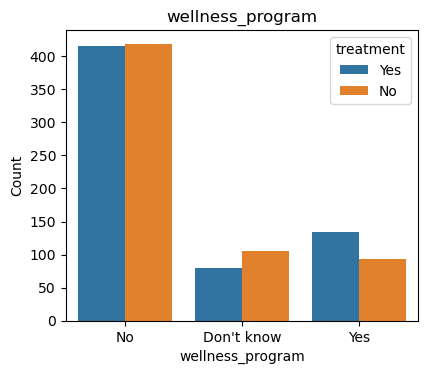

In [37]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(data=data,x='wellness_program',hue='treatment')
plt.title('wellness_program')
plt.xlabel('wellness_program')
plt.ylabel('Count')

plt.show()

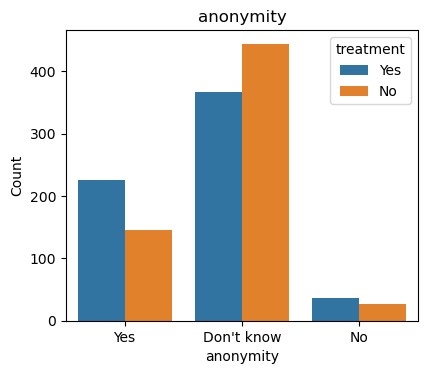

In [38]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(data=data,x='anonymity',hue='treatment')
plt.title('anonymity')
plt.xlabel('anonymity')
plt.ylabel('Count')

plt.show()

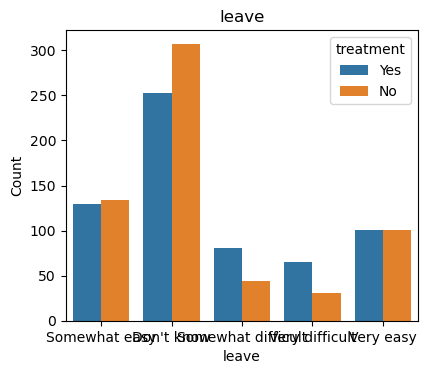

In [39]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(data=data,x='leave',hue='treatment')
plt.title('leave')
plt.xlabel('leave')
plt.ylabel('Count')

plt.show()

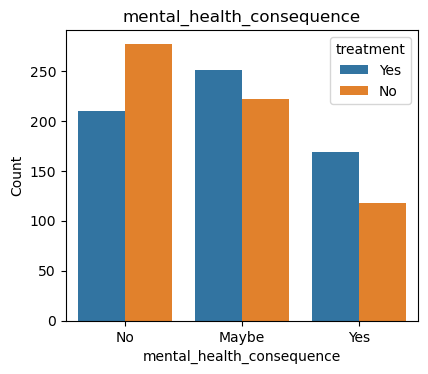

In [40]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(data=data,x='mental_health_consequence',hue='treatment')
plt.title('mental_health_consequence')
plt.xlabel('mental_health_consequence')
plt.ylabel('Count')

plt.show()

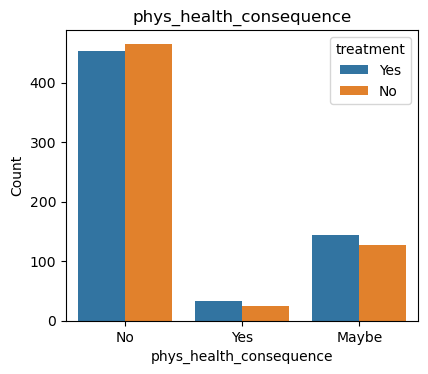

In [41]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(data=data,x='phys_health_consequence',hue='treatment')
plt.title('phys_health_consequence')
plt.xlabel('phys_health_consequence')
plt.ylabel('Count')

plt.show()

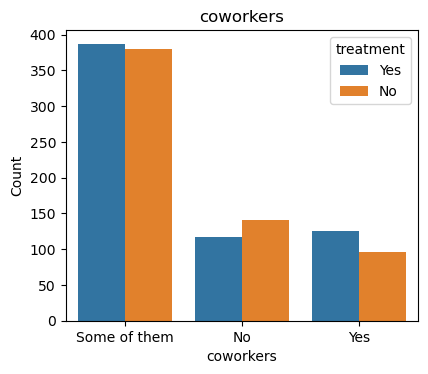

In [42]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(data=data,x='coworkers',hue='treatment')
plt.title('coworkers')
plt.xlabel('coworkers')
plt.ylabel('Count')

plt.show()

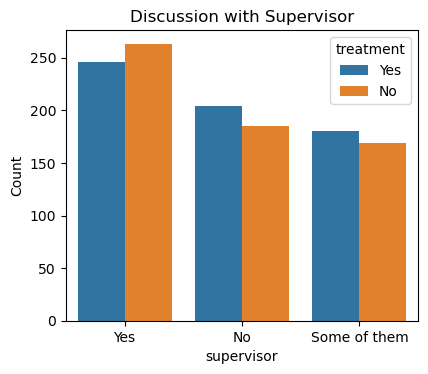

In [43]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(data=data,x='supervisor',hue='treatment')
plt.title('Discussion with Supervisor')
plt.xlabel('supervisor')
plt.ylabel('Count')

plt.show()

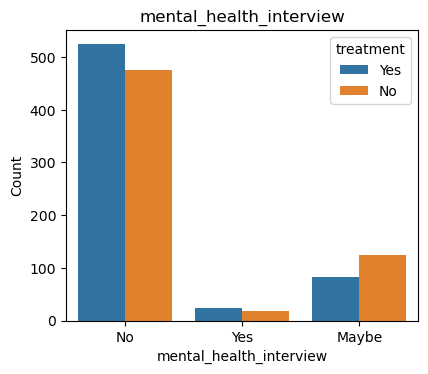

In [44]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(data=data,x='mental_health_interview',hue='treatment')
plt.title('mental_health_interview')
plt.xlabel('mental_health_interview')
plt.ylabel('Count')

plt.show()

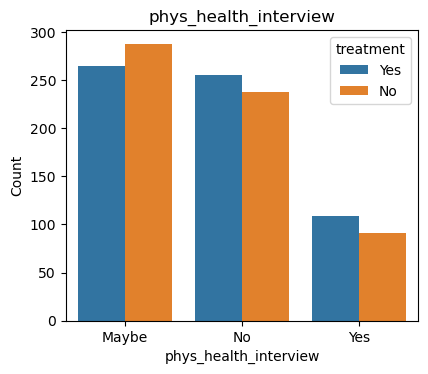

In [45]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data=data,x='phys_health_interview',hue='treatment')
plt.title('phys_health_interview')
plt.xlabel('phys_health_interview')
plt.ylabel('Count')

plt.show()

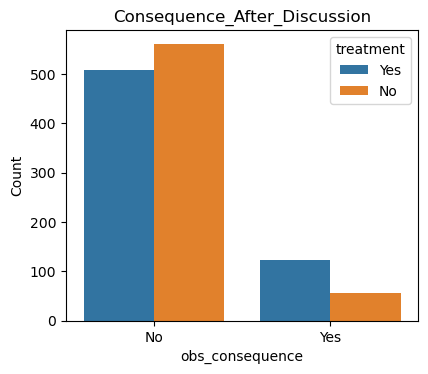

In [46]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(data=data,x='obs_consequence',hue='treatment')
plt.title('Consequence_After_Discussion')
plt.xlabel('obs_consequence')
plt.ylabel('Count')

plt.show()




In [47]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,11,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,979,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
x=data.drop('treatment',axis=1)
y=data['treatment']

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


In [50]:
ct=ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history',
                                            'work_interfere','no_employees','remote_work','tech_company',
                                            'benefits','care_options','wellness_program','seek_help',
                                            'anonymity','leave','mental_health_consequence',
                                             'phys_health_consequence','coworkers','supervisor',
                                            'mental_health_interview','phys_health_interview',
                                            'mental_vs_physical','obs_consequence'])],remainder='passthrough')

In [51]:
x=ct.fit_transform(x)

In [52]:
le=LabelEncoder()
y=le.fit_transform(y)

In [53]:
import joblib
joblib.dump(ct,'feauture_values')

['feauture_values']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=49)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((872, 22), (375, 22), (872,), (375,))

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report,auc

In [57]:
model_dict={}
model_dict['AdaBoost Classifier']=AdaBoostClassifier(random_state=49)

In [58]:
def model_test(x_train, x_test, y_train, y_test, model, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  # Fixed variable name from 'y_ped' to 'y_pred'
    accuracy = accuracy_score(y_test, y_pred)
    print('======================================{}==============================='.format(model_name))
    print('Score is: {}'.format(accuracy))

In [59]:
for model_name,model in model_dict.items():
    model_test(x_train,x_test,y_train,y_test,model,model_name)

======================================AdaBoost Classifier===============================
Score is: 0.8453333333333334


In [60]:
abc=AdaBoostClassifier(random_state=99)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print('Accuracy of AdaBoost=',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost= 0.8453333333333334


In [61]:
from sklearn.model_selection import RandomizedSearchCV
params_abc={'n_estimators':[int(x) for x in np.linspace(start=1,stop=50,num=15)],
        'learning_rate':[(0.97 + x/100) for x in range(0,8)],
           }
abc_random=RandomizedSearchCV(random_state=49,estimator=abc,param_distributions=params_abc,n_iter=50,cv=5,n_jobs=-1)

In [62]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [63]:
abc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [64]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.04}

In [65]:
abc_tuned=AdaBoostClassifier(random_state=49,n_estimators=11,learning_rate=1.02)
abc_tuned.fit(x_train,y_train)
pred_abc_tuned=abc_tuned.predict(x_test)
print('Accuracy of Adaboost(tuned)=',accuracy_score(y_test,pred_abc_tuned))

Accuracy of Adaboost(tuned)= 0.8746666666666667


Text(50.722222222222214, 0.5, 'Actual')

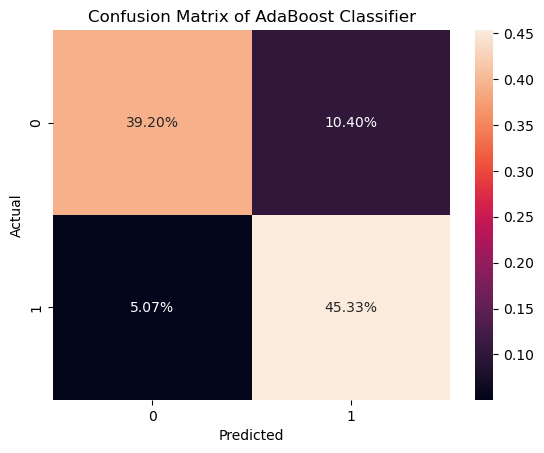

In [66]:
cf_matrix=confusion_matrix(y_test,pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

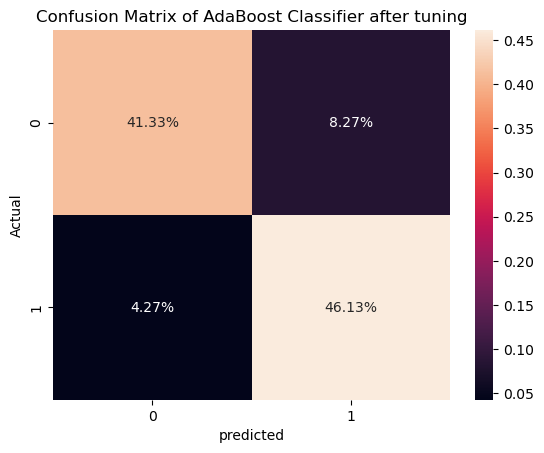

In [67]:
cf_matrix=confusion_matrix(y_test,pred_abc_tuned)
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('predicted')
plt.ylabel('Actual')

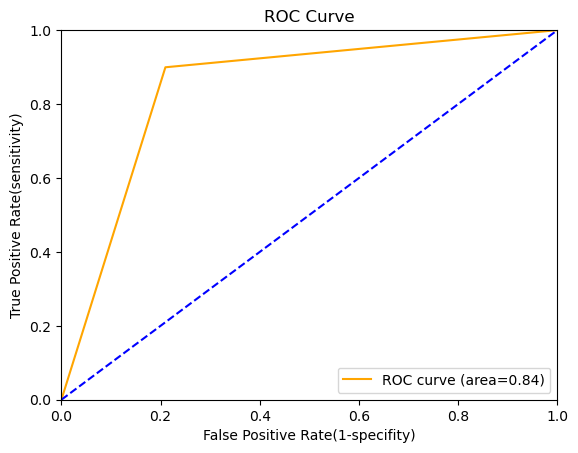

(array([0.        , 0.20967742, 1.        ]),
 array([0.       , 0.8994709, 1.       ]),
 array([2, 1, 0]))

In [68]:
from sklearn import metrics 
fpr_abc,tpr_abc,thresholds_abc=roc_curve(y_test,pred_abc)
roc_auc_abc=metrics.auc(fpr_abc,tpr_abc)
plt.plot(fpr_abc,tpr_abc,color='orange',label='ROC curve (area=%0.2f)' %roc_auc_abc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1-specifity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc)



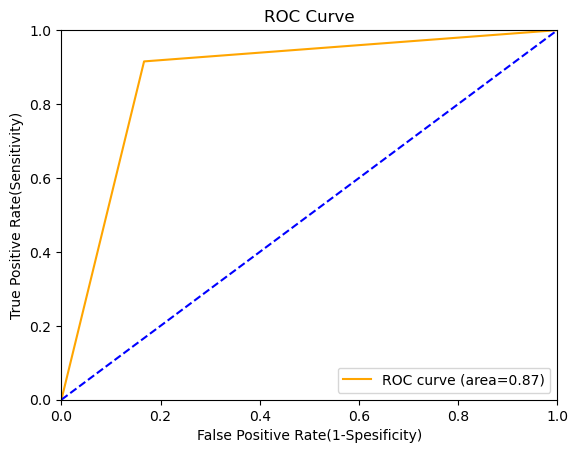

(array([0.        , 0.16666667, 1.        ]),
 array([0.        , 0.91534392, 1.        ]),
 array([2, 1, 0]))

In [69]:
fpr_abc_tuned,tpr_abc_tuned,thresholda_abc_tuned=roc_curve(y_test,pred_abc_tuned)
roc_auc_abc_tuned=metrics.auc(fpr_abc_tuned,tpr_abc_tuned)
plt.plot(fpr_abc_tuned,tpr_abc_tuned,color='orange',label='ROC curve (area=%0.2f)' %roc_auc_abc_tuned)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1-Spesificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc_tuned)

In [70]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       186
           1       0.81      0.90      0.85       189

    accuracy                           0.85       375
   macro avg       0.85      0.84      0.84       375
weighted avg       0.85      0.85      0.84       375



In [71]:
print(classification_report(y_test, pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       186
           1       0.85      0.92      0.88       189

    accuracy                           0.87       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.88      0.87      0.87       375

